## <font color=#B2D732> <span style="background-color: #4424D6"> Imports

In [2]:
import sys,json
import glob, os
from nilearn import plotting, datasets     

sys.path.append('/media/miplab-nas2/Data3/BMPD/hc_project/analysis/code/')

from stats_group_level import Stats

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## <font color=#B2D732> <span style="background-color: #4424D6"> A/ Initialization

 ### <font color=#4424D6> I. Configuration & parameters </font >

In [30]:
# Load config file ------------------------------------------------------------
with open('../../config/config_seed2voxels_2ndlevel_NK.json') as config_file: # the notebook should be in 'xx/notebook/' folder #config_proprio
    config = json.load(config_file) # load config file should be open first and the path inside modified
    
#ana2run=["frost_C1_gm","frost_C2_gm","frost_C3_gm","frost_C4_gm","frost_C5_gm","frost_C6_gm","frost_C7_gm"] # copy and pass the analyse name (same as config["seeds"])
ana2run=["frost_C1_gmwm","frost_C2_gmwm","frost_C3_gmwm","frost_C4_gmwm","frost_C5_gmwm","frost_C6_gmwm","frost_C7_gmwm"] # copy and pass the analyse name (same as config["seeds"])


#The model should be defined in the config file line 5 : "OneSampleT" "TwoSampT_paired" "TwoSampT_unpaired" 'HigherOrder_paired'

### <font color=#4424D6> II. Initialize class based on this </font>

In [31]:
stats={}
for ana_name in ana2run:
    stats[ana_name]=Stats(config,ana_name,save_ana=True) # initialize the function


************************************** 
Initiate frost_C1_gmwm analysis
  
> Statistical model: OneSampleT
> Number of participants: 31
> Mask : julich_pre_and_postcentral.nii.gz
> Saved here : /media/miplab-nas2/Data3/BMPD/hc_project//brain_spine/results/seed_to_voxels//2_second_level/OneSampleT/julich_pre_and_postcentral/Corr/frost_C1_gmwm
  
************************************** 
Initiate frost_C2_gmwm analysis
  
> Statistical model: OneSampleT
> Number of participants: 31
> Mask : julich_pre_and_postcentral.nii.gz
> Saved here : /media/miplab-nas2/Data3/BMPD/hc_project//brain_spine/results/seed_to_voxels//2_second_level/OneSampleT/julich_pre_and_postcentral/Corr/frost_C2_gmwm
  
************************************** 
Initiate frost_C3_gmwm analysis
  
> Statistical model: OneSampleT
> Number of participants: 31
> Mask : julich_pre_and_postcentral.nii.gz
> Saved here : /media/miplab-nas2/Data3/BMPD/hc_project//brain_spine/results/seed_to_voxels//2_second_level/OneSampleT/julich_p

## <font color=#B2D732> <span style="background-color: #4424D6"> B/ Create design matrix

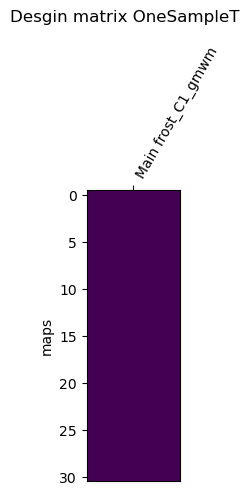

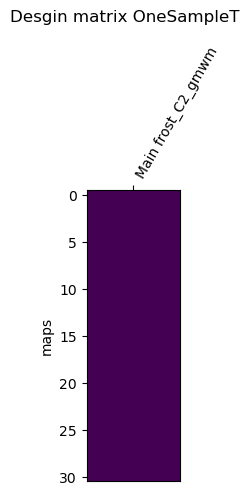

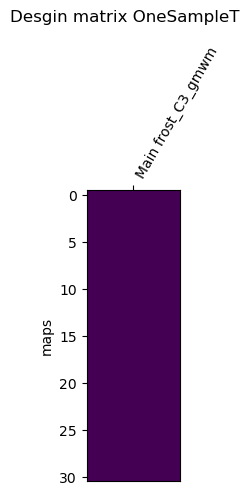

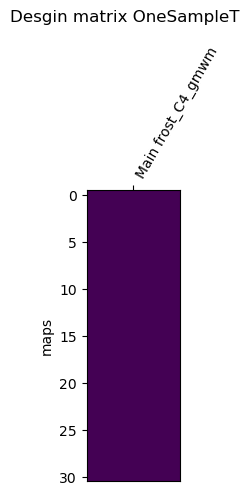

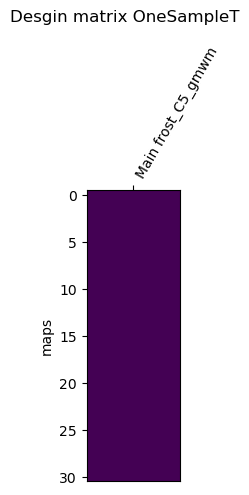

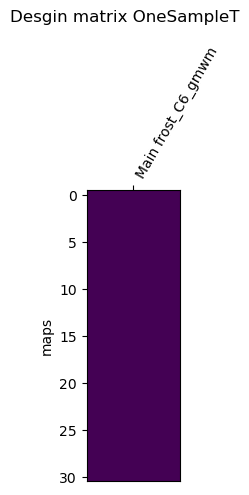

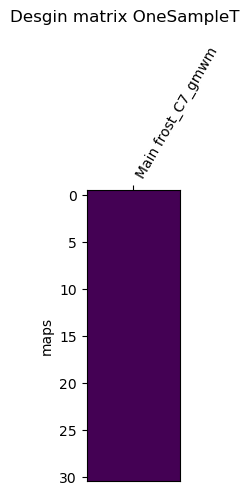

In [32]:
Design_matrix={}
for ana_name in ana2run:
    Design_matrix[ana_name]=stats[ana_name].design_matrix(plot_matrix= True,save_matrix=True) #contrast_name="4quad_9levels",


## <font color=#B2D732> <span style="background-color: #4424D6"> C/ Create second level model and apply correction

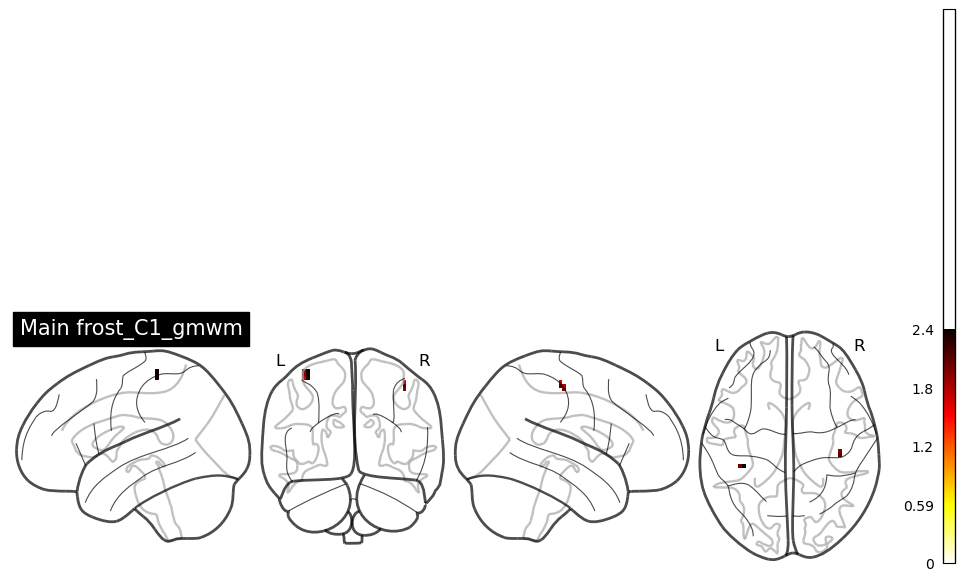

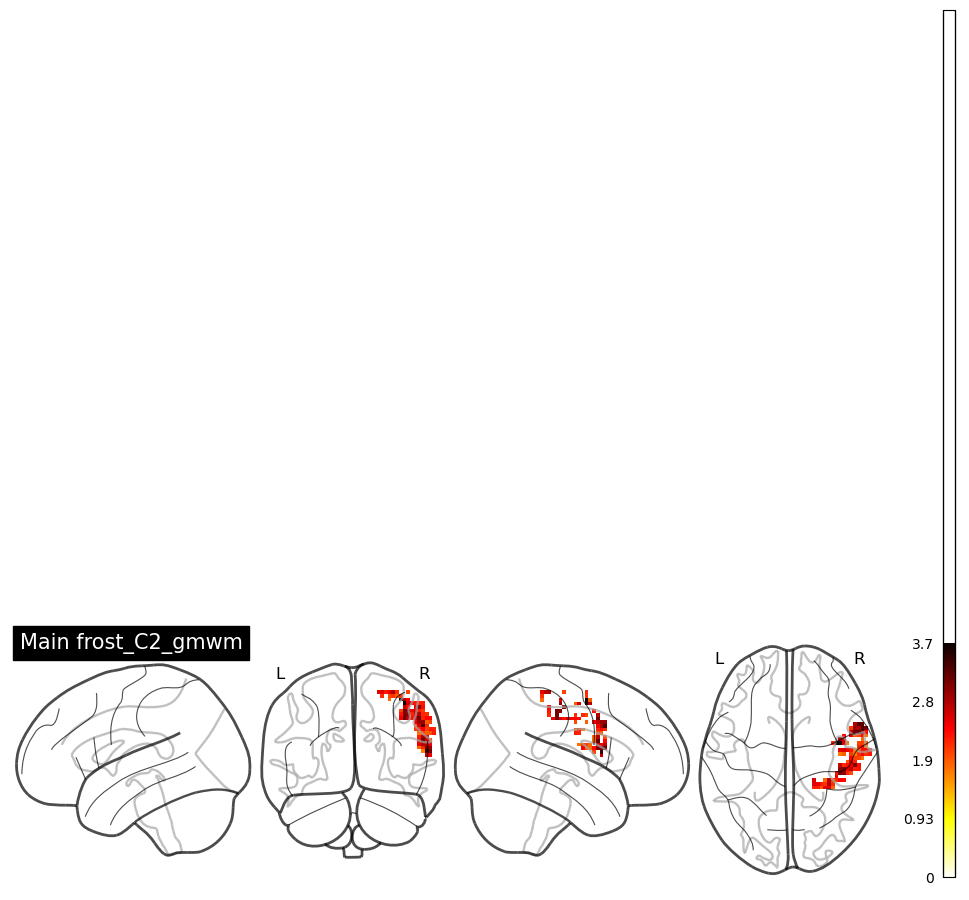

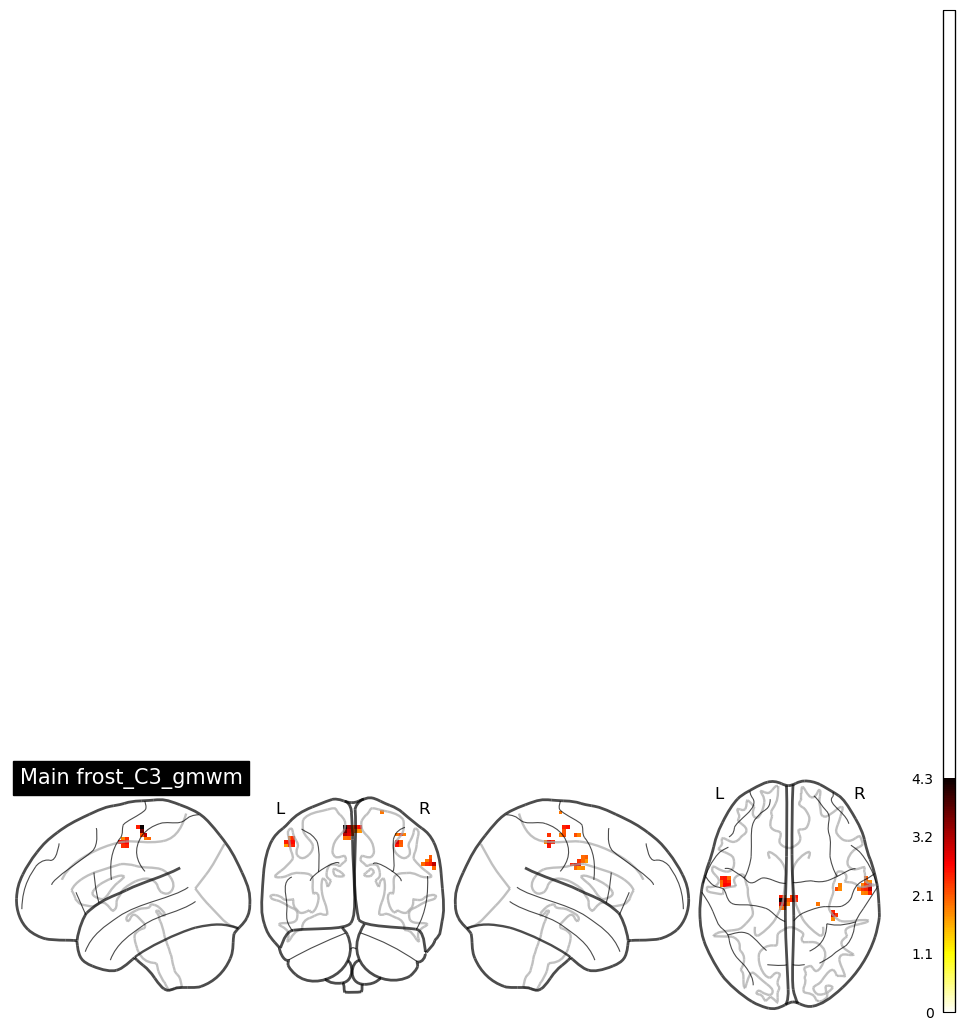

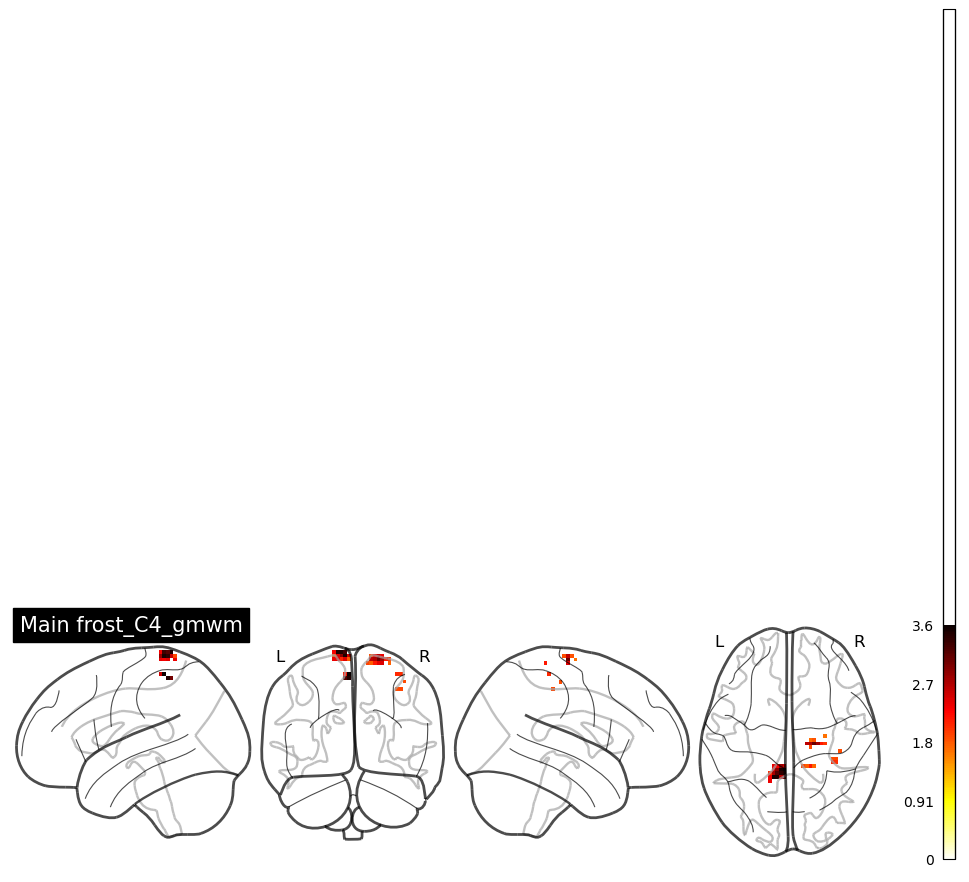

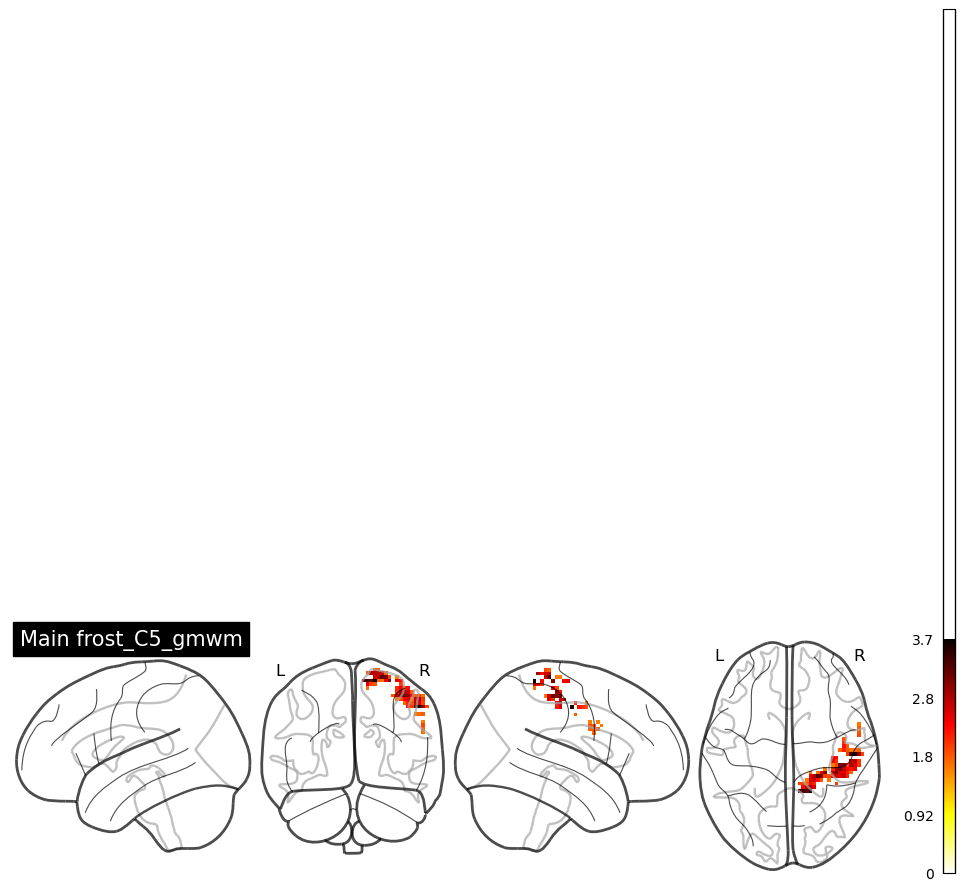

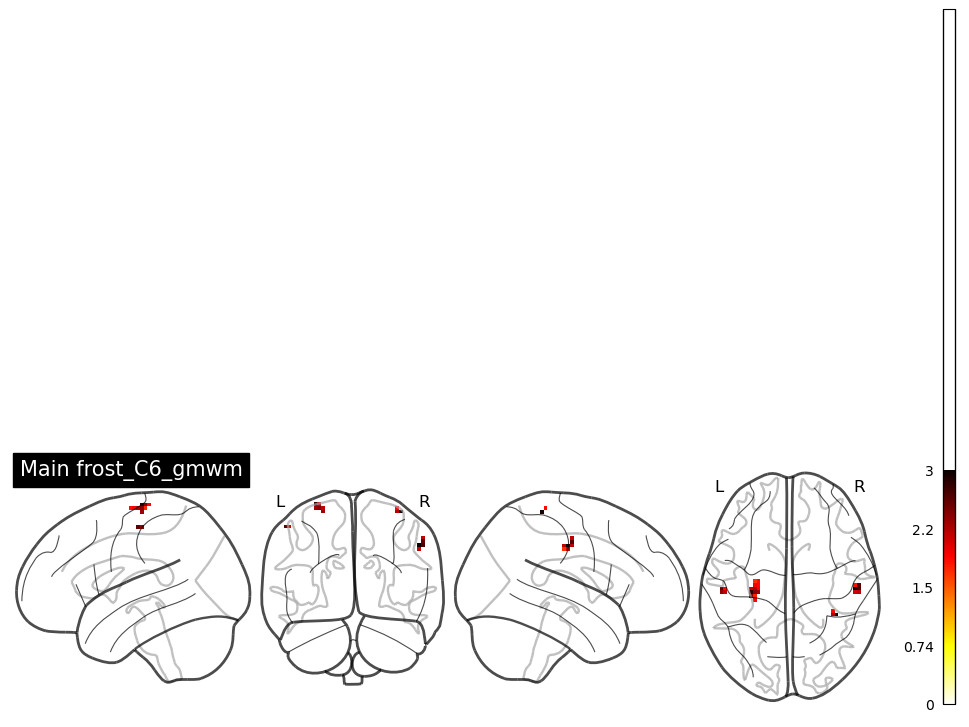

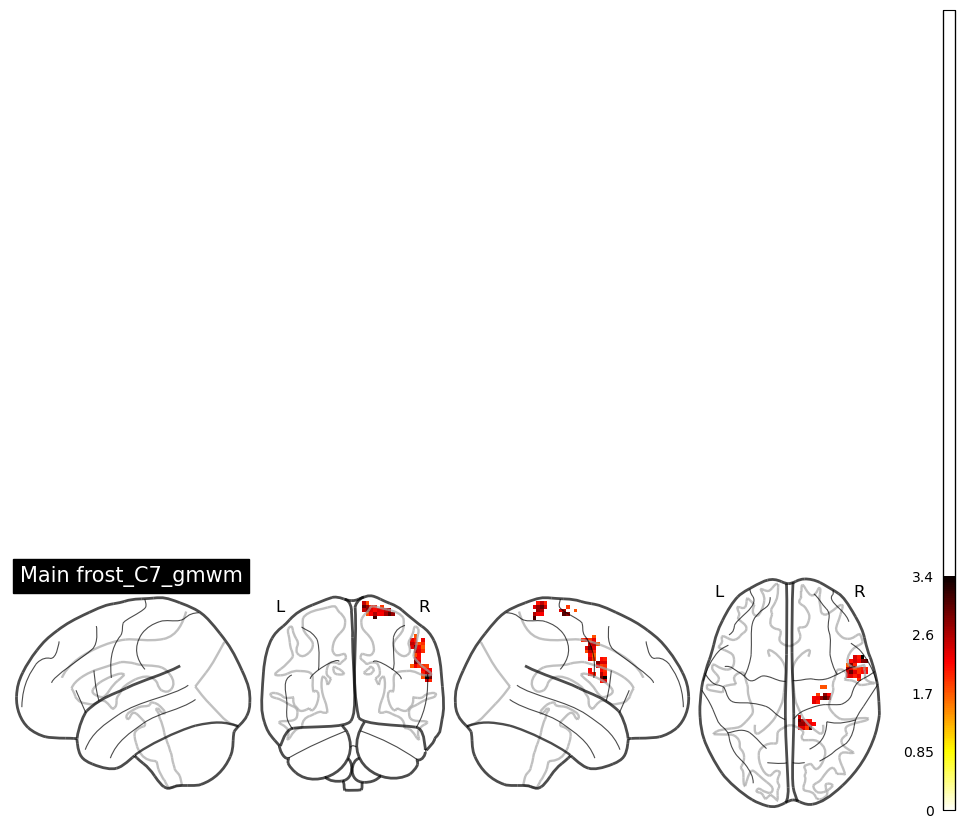

In [33]:
maps_uncorr={}
for ana_name in ana2run:
    maps_uncorr[ana_name]=stats[ana_name].secondlevelmodel(Design_matrix[ana_name],plot_2ndlevel=False,save_img=True,parametric=True) #stats_1T.secondlevelmodel(Design_matrix_1T)
    stats[ana_name].secondlevel_correction(maps_uncorr[ana_name],p_value=0.05,corr="fpr",plot_stats_corr=True,save_img=True) #stats_1T.secondlevelmodel(Design_matrix_1T)


In [13]:
maps_uncorr[ana_name]

{'Main frost_C1_gm': {'z_score': <nibabel.nifti1.Nifti1Image at 0x7fd30ac45eb0>,
  'stat': <nibabel.nifti1.Nifti1Image at 0x7fd30ac45460>,
  'p_value': <nibabel.nifti1.Nifti1Image at 0x7fd30ac458b0>,
  'effect_size': <nibabel.nifti1.Nifti1Image at 0x7fd30ac45550>,
  'effect_variance': <nibabel.nifti1.Nifti1Image at 0x7fd30ac454c0>}}

In [ ]:
maps_uncorr[ana_name]

## <font color=#B2D732> <span style="background-color: #4424D6"> D/ plot surface view

/cerebro/cerebro1/dataset/bmpd/derivatives/thibault_test/code/toolbox/bmpd_python/lib/python3.6/site-packages/nilearn/plotting/displays/_slicers.py:382: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))


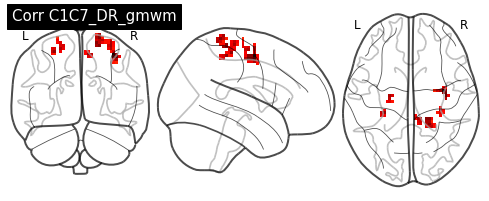

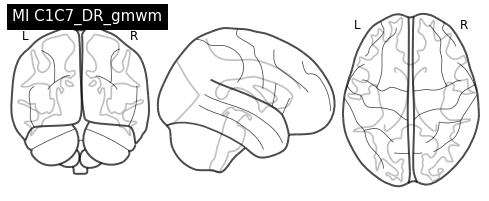

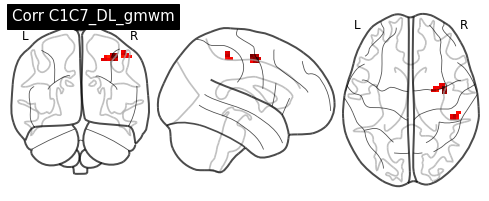

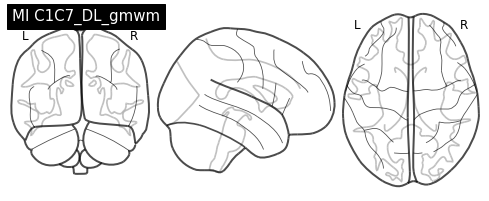

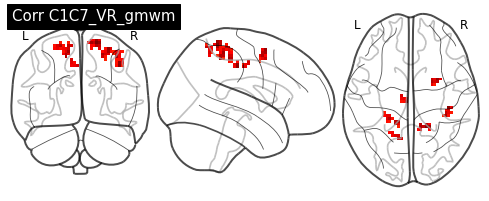

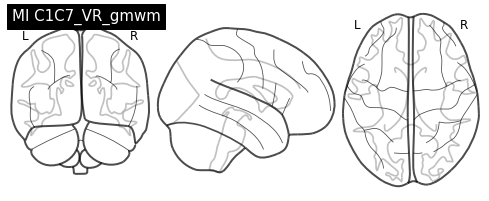

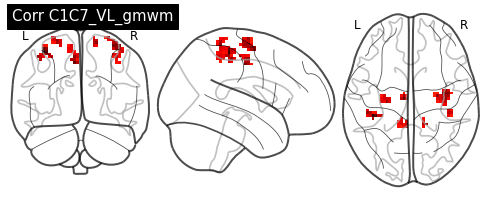

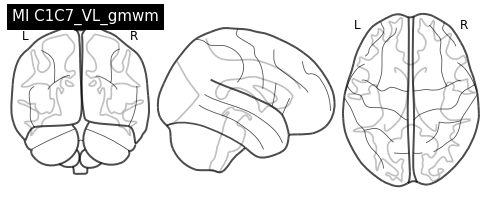

In [72]:
from nilearn import plotting
main_dir=config["second_level"]+"/OneSampleT/MNI_GM_3mm_SMC/"
seeds=["C1C7_DR_gmwm","C1C7_DL_gmwm","C1C7_VR_gmwm","C1C7_VL_gmwm"]
measures=["Corr","MI"]
for seed in seeds:

    for measure in measures:

        image=glob.glob(main_dir + "/" + measure + "/" + seed + "/fpr_corrected/Main "+seed+"_fpr_p01.nii.gz")[0]



        #plotting.plot_stat_map(image,threshold=0, vmax=4, display_mode='ortho',draw_cross=False,cut_coords=[-1,-17.5,59],title=measure + " " + seed)

        plotting.plot_glass_brain(image,threshold=0, vmax=4, title=measure + " " + seed)


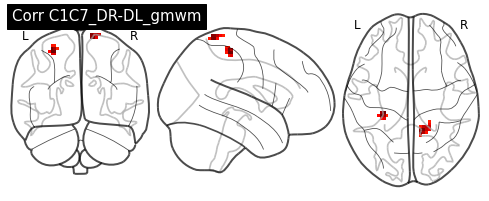

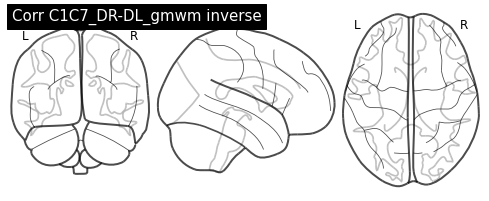

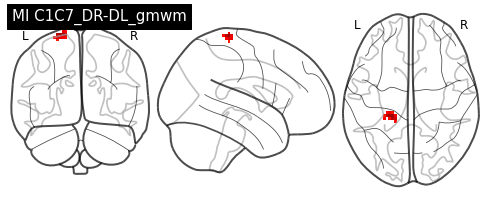

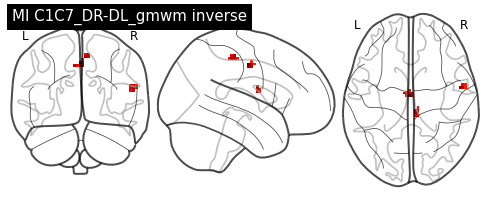

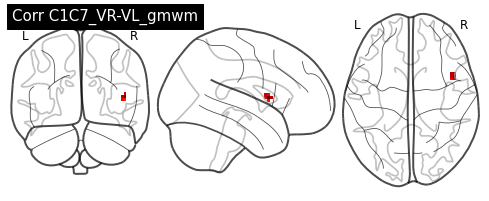

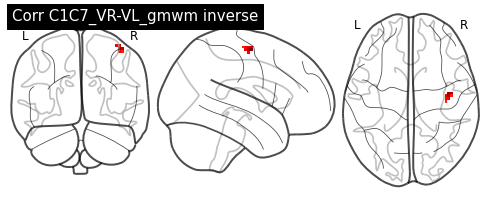

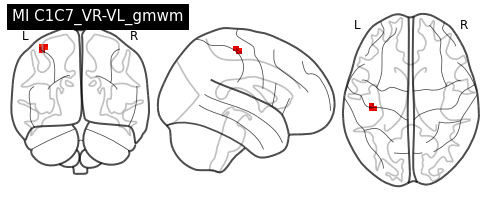

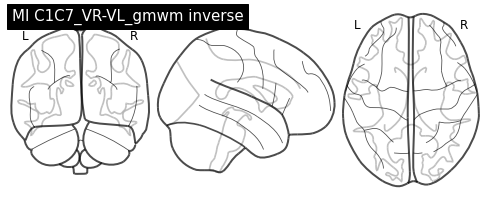

In [73]:
from nilearn import plotting
main_dir=config["second_level"]+"/TwoSampT_paired/MNI_GM_3mm_SMC/"
seeds=["C1C7_DR-DL_gmwm","C1C7_VR-VL_gmwm"]
measures=["Corr","MI"]
for seed in seeds:
    for measure in measures:
        image1=glob.glob(main_dir + "/" + measure + "/" + seed + "/fpr_corrected/"+ seed.split("-")[0] + "*fpr_p01.nii.gz")[0]
        image2=glob.glob(main_dir + "/" + measure + "/" + seed + "/fpr_corrected/C1C7_"+ seed.split("-")[-1] + "*fpr_p01.nii.gz")[0]

        plotting.plot_glass_brain(image1,threshold=0, vmax=4, title=measure + " " + seed)
        plotting.plot_glass_brain(image2,threshold=0, vmax=4, title=measure + " " + seed + " inverse")


In [69]:
image1

'/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project/seed_to_voxels/summer_2023/2_second_level//TwoSampT_paired/MNI_GM_3mm//Corr/C1C7_DR-DL_gmwm/fpr_corrected/C1C7_DR*fpr_p01.nii.gz'

In [65]:
main_dir + "/" + measure + "/" + seed + "/fpr_corrected/C1C7_"+ seed.split("-")[-1] + "*fpr_p01.nii.gz"

'/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project/seed_to_voxels/summer_2023/2_second_level//TwoSampT_paired/MNI_GM_3mm//MI/C1C7_VR-VL_gmwm/fpr_corrected/C1C7_VL_gmwm*fpr_p01.nii.gz'